In [342]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

'''
Valor de aluguel por tamamho do imóvel em metros quadrados
'''

# Dados de entrada
X = np.array([[20], [40],[80], [100], [200], [300], [400], [1000]]) # Área em metros quadrados
y = np.array([[1000], [1500], [2500], [3000], [5000], [8000], [10000], [20000]]) # Valor em reais

In [343]:
# Normalizando dados
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_norm = scaler_x.fit_transform(X)
y_norm = scaler_y.fit_transform(y)

In [344]:
# Criar a estrutura de rede neural para a regressão linear
modelo = tf.keras.Sequential([
    keras.layers.Dense(1, input_dim=1, use_bias=True)  # Garantir que o modelo entenda que X é 1D)
])

# Compilando o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

/home/pablo/Documents/desenvolvimento/cybersoul-jupyter/cybersoul-estudos/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [366]:
# Treinando o modelo
historia = modelo.fit(X_norm, y_norm, epochs=800, verbose=False)

In [367]:
# Predição normalizada
y_norm_pred = modelo.predict(X_norm)

# Desnormalização para obter valores reais
y_pred = scaler_y.inverse_transform(y_norm_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [368]:
print(y_pred)

[[ 1553.2979]
 [ 1942.9307]
 [ 2722.1943]
 [ 3111.8264]
 [ 5059.9863]
 [ 7008.147 ]
 [ 8956.307 ]
 [20645.268 ]]


In [369]:
# Para várias previsões de uma vez
areas_novas = np.array([[100], [150], [250], [1000]])
areas_norm = scaler_x.transform(areas_novas) # Normalizando as áreas
valores_norm = modelo.predict(areas_norm) # Predição normalizada
valores_preditos = scaler_y.inverse_transform(valores_norm) # Desnormalizando para obter valores reais

# Exibir resultados
for i, area in enumerate(areas_novas):
    print(f"Área: {area[0]}m² → Valor estimado: R$ {valores_preditos[i][0]:.2f}") # Exibindo os resultados

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Área: 100m² → Valor estimado: R$ 3111.83
Área: 150m² → Valor estimado: R$ 4085.91
Área: 250m² → Valor estimado: R$ 6034.07
Área: 1000m² → Valor estimado: R$ 20645.27


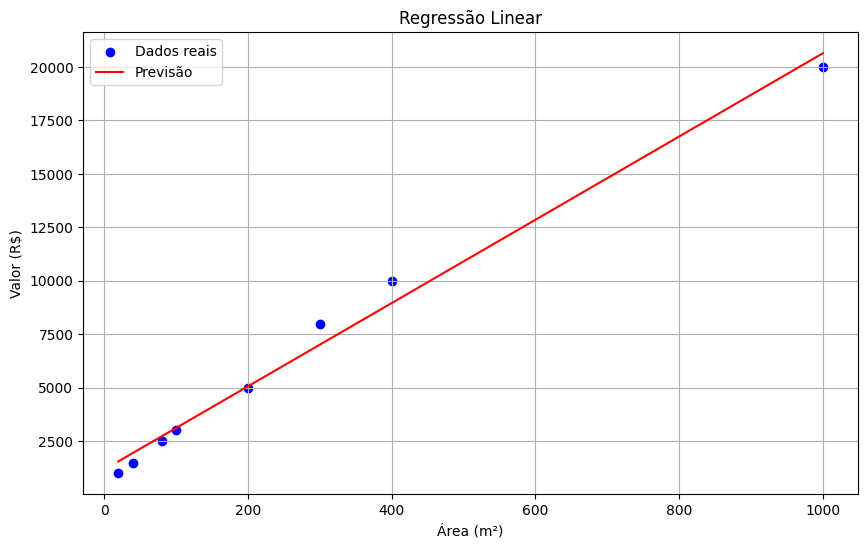

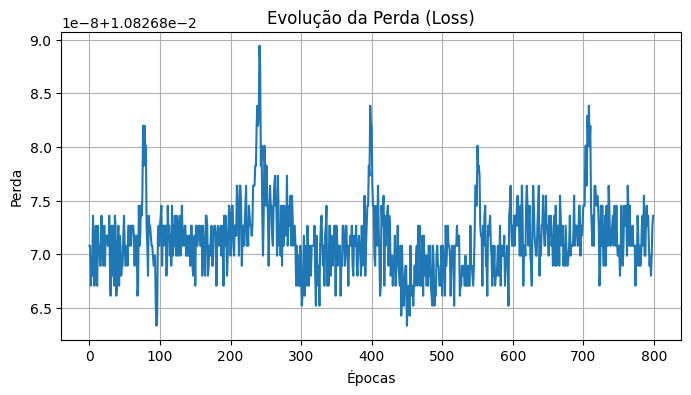

In [370]:
# Plotando
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, y_pred, color='red', label='Previsão')
plt.xlabel('Área (m²)')
plt.ylabel('Valor (R$)')
plt.title('Regressão Linear')
plt.legend()
plt.grid(True)
plt.show()

# Plotando o histórico de perda
plt.figure(figsize=(8, 4))
plt.plot(historia.history['loss'])
plt.title('Evolução da Perda (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.grid(True)
plt.show()